# Import

In [1]:
import face_recognition
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Data

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/'
# image = face_recognition.load_image_file(image_path)
# face_locations = face_recognition.face_locations(image)

# print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.



# a, b, c, d = face_locations[0]
# cropped_face = image[a:c,d:b,:]

# plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

# Function
- def get_gropped_face(image_file) : 이미지 파일에서 얼굴 영역을 가져오는 함수
- def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
- def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
- def get_distance(name1, name2) : 두 이미지(사람이름) 사이의 임베딩 벡터 거리를 구하는 함수

In [3]:
#얼굴 영역 함수 생성
def get_gropped_face(image_file):
    # [[YOUR CODE]]
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]    
    return cropped_face

In [4]:
# face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [5]:

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)

In [7]:
# L2 distance
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)


In [8]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [9]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

# 비교 데이터

In [10]:

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['꽈두룹.jpeg', '김희철.jpg', '이정재.jpg', '조승우.jpeg', '윤경신.jpg', '류준열.jpg', '조원희.jpg', '최현석.jpg', '김구라.jpg', '무라니시.png', '차범근.jpeg', '길.jpg', '레오나르도 디카프리오.jpeg', '개리.jpg', '이범수.jpeg', '박해일.jpeg', '유지태.jpg', '공유.jpg', '지드래곤.jpeg', '황정민.jpg', 'bush.jpeg', '딕헌터.jpeg', '야마다 타카유키.jpeg', '안재홍.jpg', '다니엘 크레이그.jpeg', '박완규.png', '서장훈.jpg', '성시경.jpg', '김래원.jpeg', '잭 스페이더.jpeg', '클린트 이스트우드.jpg', 'biden.jpg', '박명수.jpg', '이준혁.jpeg', '차명석.jpg', '최양락.jpg', '김민재.jpeg', '리암 니슨.png', '철면수심.jpg', '박진영.jpg', '이영하.jpg', '이승환.jpg', '오재원.jpg', '김윤석.jpeg', 'trump.jpg', '최무성.jpg', '정국.jpg', '배성재.jpg', '슈가.jpg', '성룡.jpg', '케빈 스페이시.jpeg', 'clinton.jpeg', '마크 러팔로.jpeg', '이경규.jpeg', '봉준호.jpg', '손호준.jpeg', '최민식.jpg', '크리스 에반스.jpg', '홍구.jpg', '류승룡.jpeg', '이동휘.jpg', '켄 정.jpeg', '박휘순.jpg', '김상호.png', '개코.jpeg', '박찬욱.jpeg', '돈스파이크.jpg', '박용택.jpg', '브래들리 쿠퍼.jpg', '박건우.png', '씨잼.jpg', '기성용.jpg', '유재석.jpg', '손흥민.jpg', '윤도현.png', '매드클라운.jpeg', '김연우.jpeg', '사무엘 L 잭슨.jpg', '이승기.jpeg', '윤종신.jpeg', '강동원.jpg', '김영삼.jpeg', '

In [11]:
image_file = os.path.join(dir_path, '나.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.09174646,  0.13498467,  0.03580151, -0.02699748, -0.12306905,
        -0.06353981, -0.08879967, -0.16854998,  0.10521227, -0.11455005,
         0.23305286, -0.07409959, -0.20576547, -0.11459637, -0.02579671,
         0.19852412, -0.2472544 , -0.15162672, -0.0219805 ,  0.00080708,
         0.10559688,  0.04440857, -0.00616721,  0.03413756, -0.06103396,
        -0.39040884, -0.11765438, -0.0501125 , -0.01409203, -0.06542027,
        -0.06159299,  0.05499361, -0.20019501, -0.08956177,  0.06104065,
         0.0790682 , -0.06280898, -0.11169578,  0.16718149, -0.03254113,
        -0.1778778 ,  0.07828541,  0.09697478,  0.24298853,  0.20757243,
         0.05836677, -0.00339721, -0.15756394,  0.15659343, -0.12812784,
         0.01568335,  0.16237676,  0.12557527,  0.09105046,  0.01999622,
        -0.13645883,  0.022666  ,  0.05388871, -0.19529751, -0.03892095,
         0.09165691, -0.10819731, -0.01371468, -0.165676  ,  0.24369501,
         0.04764207, -0.11575269, -0.18474533,  0.1

In [12]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('나')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

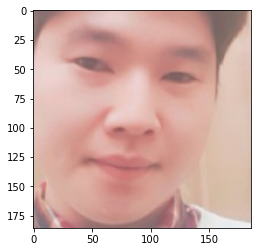

In [13]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/나.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

# 닮은 순위

In [14]:
face= get_nearest_face('나')

순위 1 : 이름(박정민), 거리(0.4354360962075099)
순위 2 : 이름(이대형), 거리(0.44511632672012524)
순위 3 : 이름(씨잼), 거리(0.45162874961397903)
순위 4 : 이름(정수빈), 거리(0.4539047616603266)
순위 5 : 이름(박건우), 거리(0.4628684986821283)
